# Genrify Project - Phase II
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
data = data.iloc[np.random.permutation(len(data))]
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 13
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	mode
	speechiness
	tempo
	time_signature
	valence


In [35]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
792,Led Zeppelin,Rock And Roll,0.000564,0.327,219800,0.895,0.015900,9,0.104,-7.428,1,0.0367,169.390,4,0.889,hard-rock
1309,Kaleidoscope,Egyptian Garden,0.269000,0.420,183227,0.687,0.000022,7,0.168,-11.479,1,0.0374,138.529,4,0.789,psych-rock
87,The White Stripes,Fell In Love With A Girl,0.676000,0.235,110093,0.977,0.000249,0,0.800,-1.606,1,0.1410,91.929,4,0.397,alternative
939,Fetty Wap,679 (feat. Remy Boyz),0.002560,0.618,196693,0.717,0.000000,7,0.625,-5.738,1,0.3180,190.050,4,0.601,hip-hop
30,Neon Trees,Animal,0.000392,0.486,212293,0.831,0.000000,5,0.363,-5.500,1,0.0506,148.026,4,0.793,alternative


# Target variable

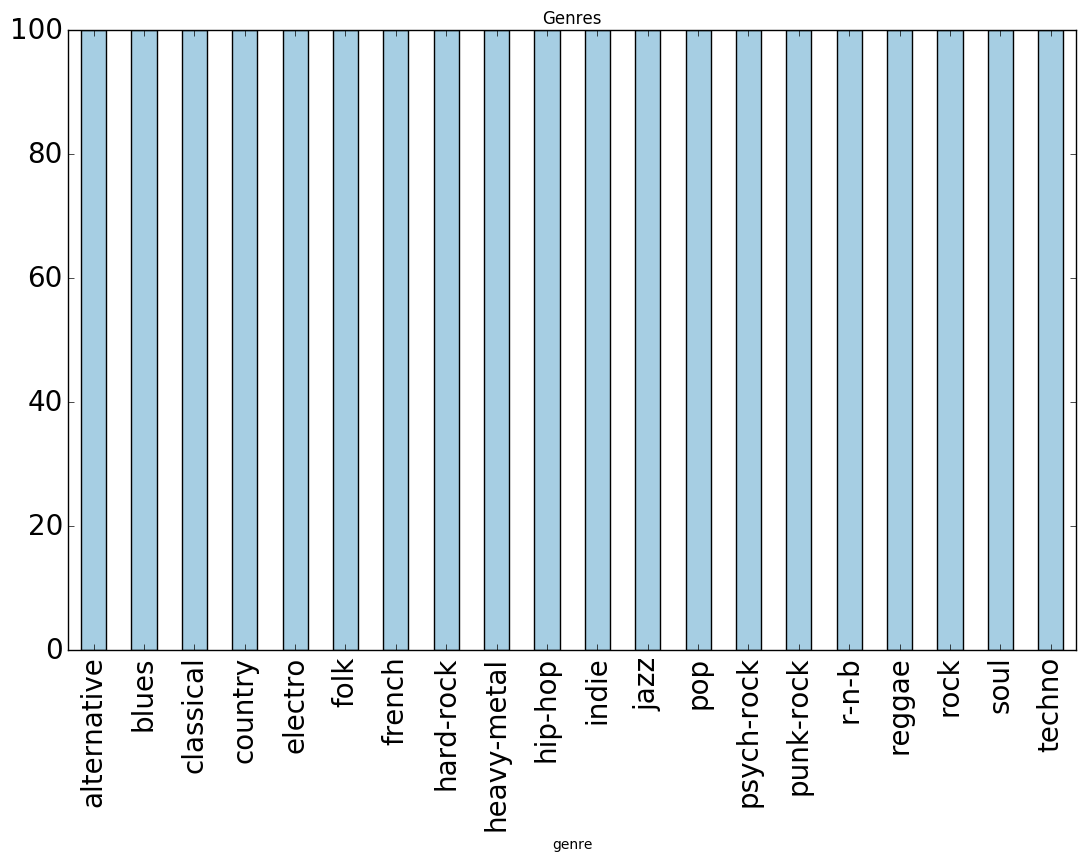

In [36]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [37]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

#Multinomial Target Variable
GENRES = ['alternative','blues','classical','country','electro','folk','french','hard-rock','heavy-metal','hip-hop','indie','jazz','pop','psych-rock','punk-rock','r-n-b','reggae','rock','soul','techno']
target_multinomial = []
for i in data['genre']:
    target_multinomial.append(GENRES.index(i))
target_multinomial=np.array(target_multinomial)

Dimension: (2000, 20)
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])


# Scaled data

In [39]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

sc_attributes = scale(attributes)
#print(repr(sc_attributes))

x_train, x_test, y_train, y_test = train_test_split(sc_attributes, target_multinomial, train_size=0.67, random_state=1)

# Plot Confusion Matrix

In [40]:
#SOURCE: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 3)
    #    print("Normalized confusion matrix")
    else:
        pass
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Learing curve

In [41]:
#SOURCE : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Random Prediction

Averaged Decision Tree Accuracy: 0.0485


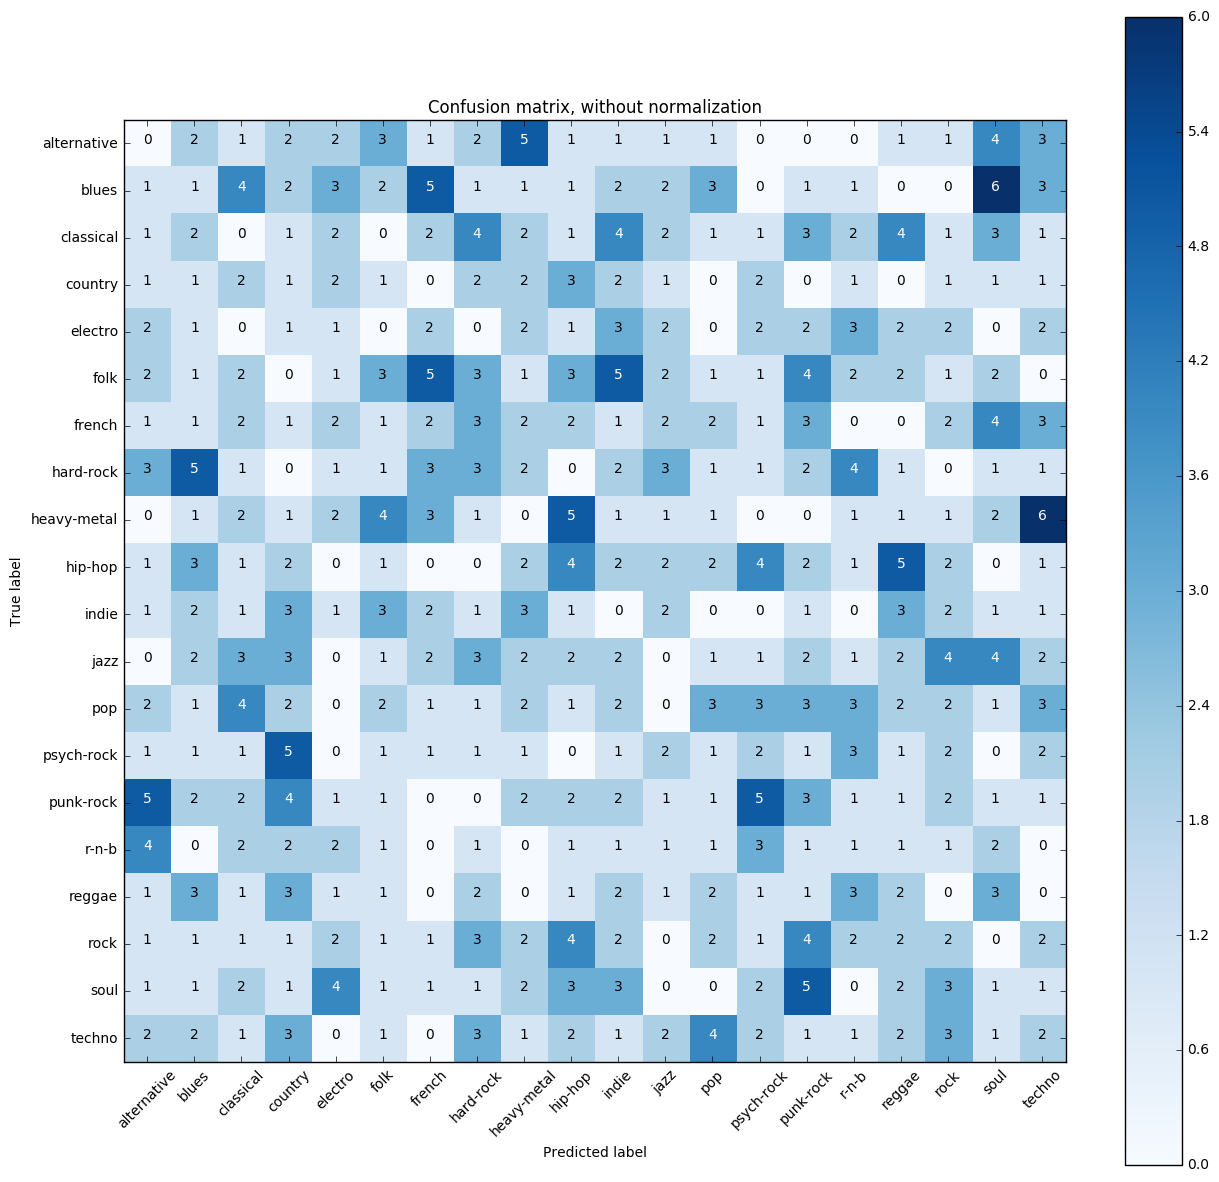

# Majority prediction

Averaged Decision Tree Accuracy: 0.05


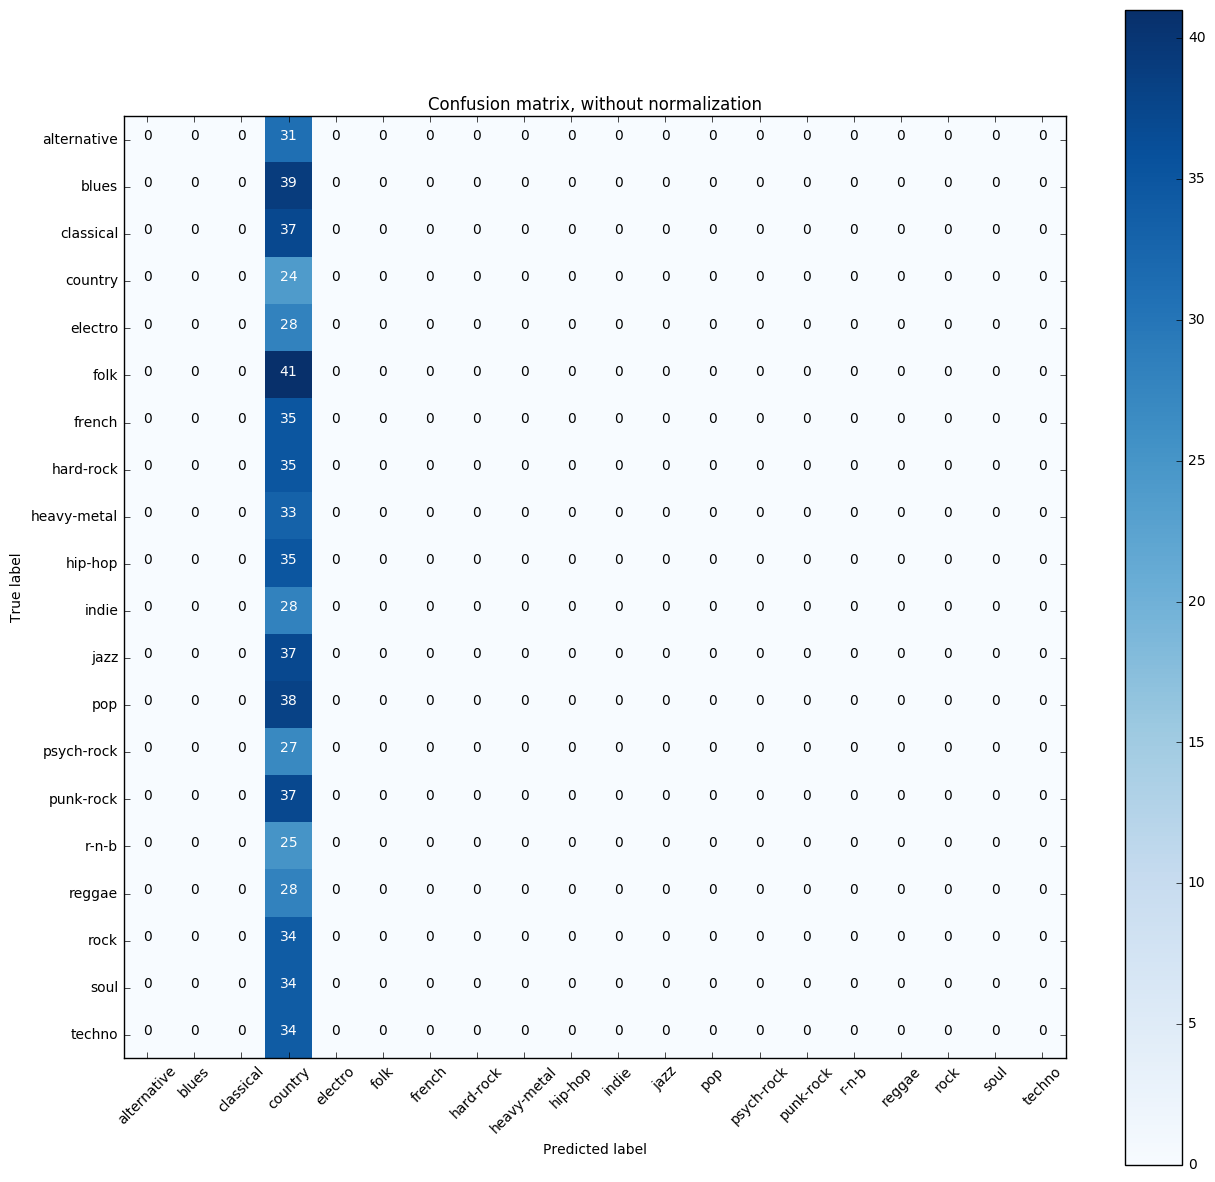

# Logistic Regression

[0.33699999999999997, 0.36500000000000005, 0.36649999999999994, 0.36399999999999999, 0.36549999999999999, 0.36649999999999999]
['loudness', 'acousticness', 'acousticness', 'loudness', 'danceability', 'acousticness', 'acousticness', 'energy', 'energy', 'danceability', 'instrumentalness', 'acousticness', 'loudness', 'instrumentalness', 'energy', 'danceability', 'speechiness', 'loudness', 'valence', 'danceability']


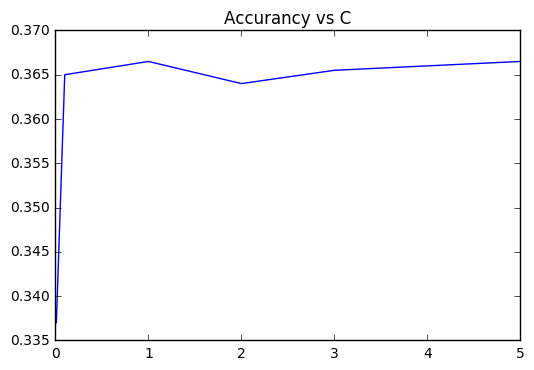

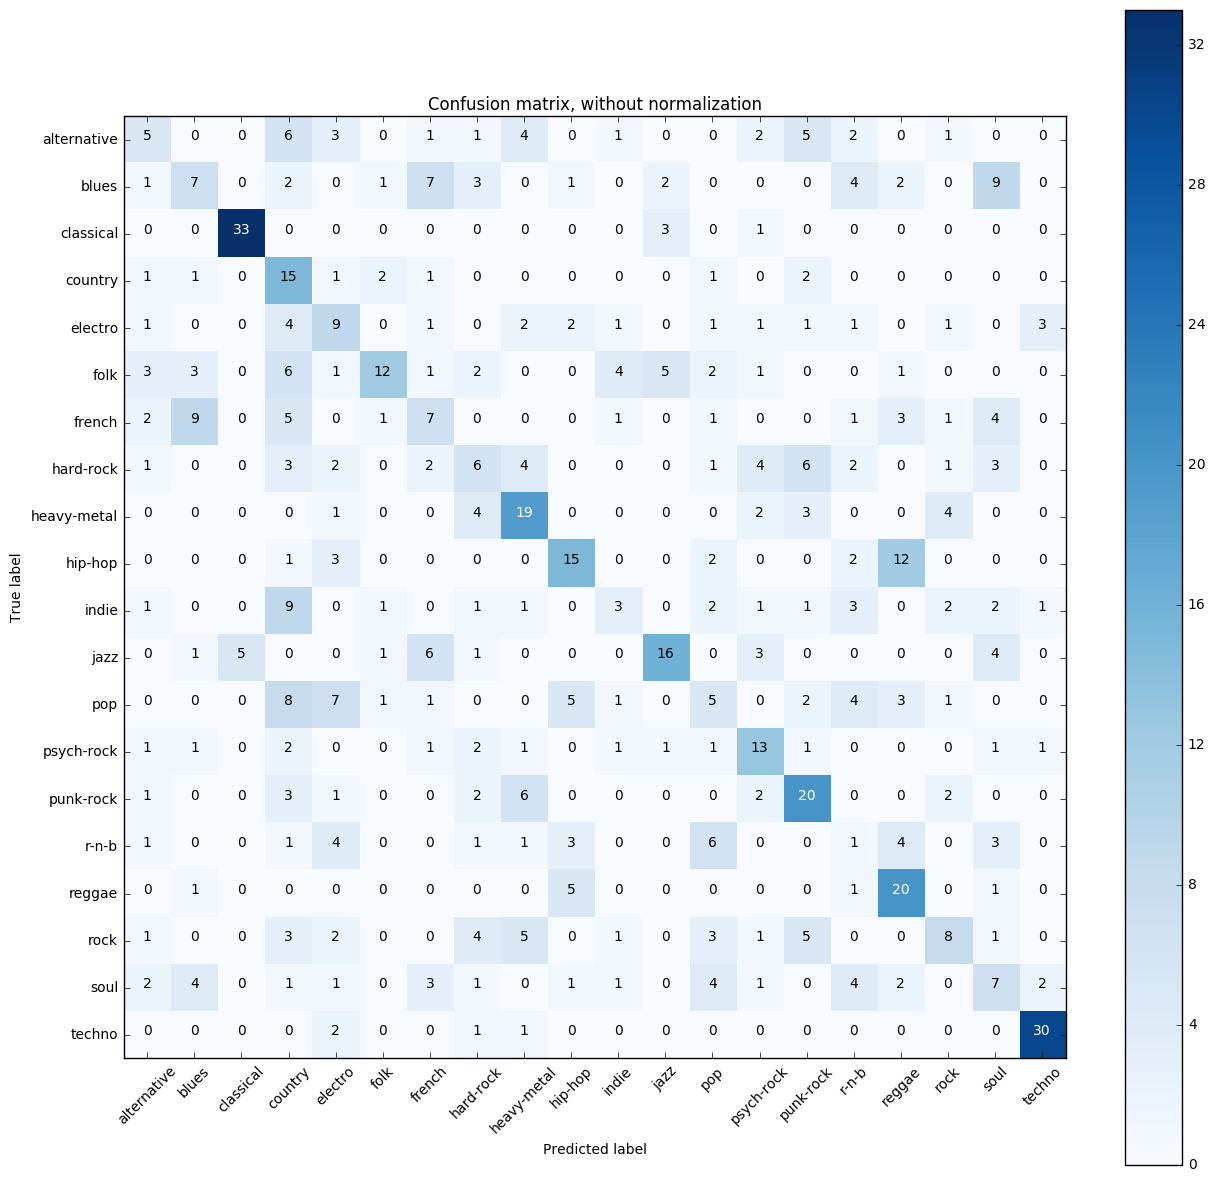

In [44]:
from sklearn.linear_model import LogisticRegression

lr_models =[]
Cs = [0.01,0.1,1,2,3,5]
for c in Cs:
    lr_models.append(LogisticRegression(C=c, multi_class='multinomial', solver='newton-cg', random_state=1))

acc_scores_c=[]
for model in lr_models:
    acc_scores = cross_val_score(model, sc_attributes, target_multinomial,cv=5)
    acc_scores_c.append(np.mean(acc_scores))

plt.plot(Cs,acc_scores_c)
plt.title('Accurancy vs C')
print(acc_scores_c)

lr_fitted = lr_models[4].fit(x_train,y_train) #model for C=3
#print(lr_fitted.coef_)   #array(nb_classes=20, nb_features=13)
indices_max_coef = np.argmax(lr_fitted.coef_, axis=1)
#print(indices_max_coef)
best_attribute_class = []     #Attribute that contributes the most to a given class based on the weight value 
for i in indices_max_coef:
    best_attribute_class.append(pd_attributes.columns.values[i])
print(best_attribute_class)

y_pred_lr = lr_fitted.predict(x_test)

cnf_lr = confusion_matrix(y_test, y_pred_lr)

plot_confusion_matrix(cnf_lr, classes=GENRES,
                      title='Confusion matrix, without normalization')
#plot_confusion_matrix(cnf_lr, classes=GENRES, normalize=True, title='Normalized confusion matrix')

#plot_learning_curve(tree_model, "Decision Tree - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)


# Decision Tree

Averaged Decision Tree Accuracy: 0.286


<module 'matplotlib.pyplot' from '/home/henri/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

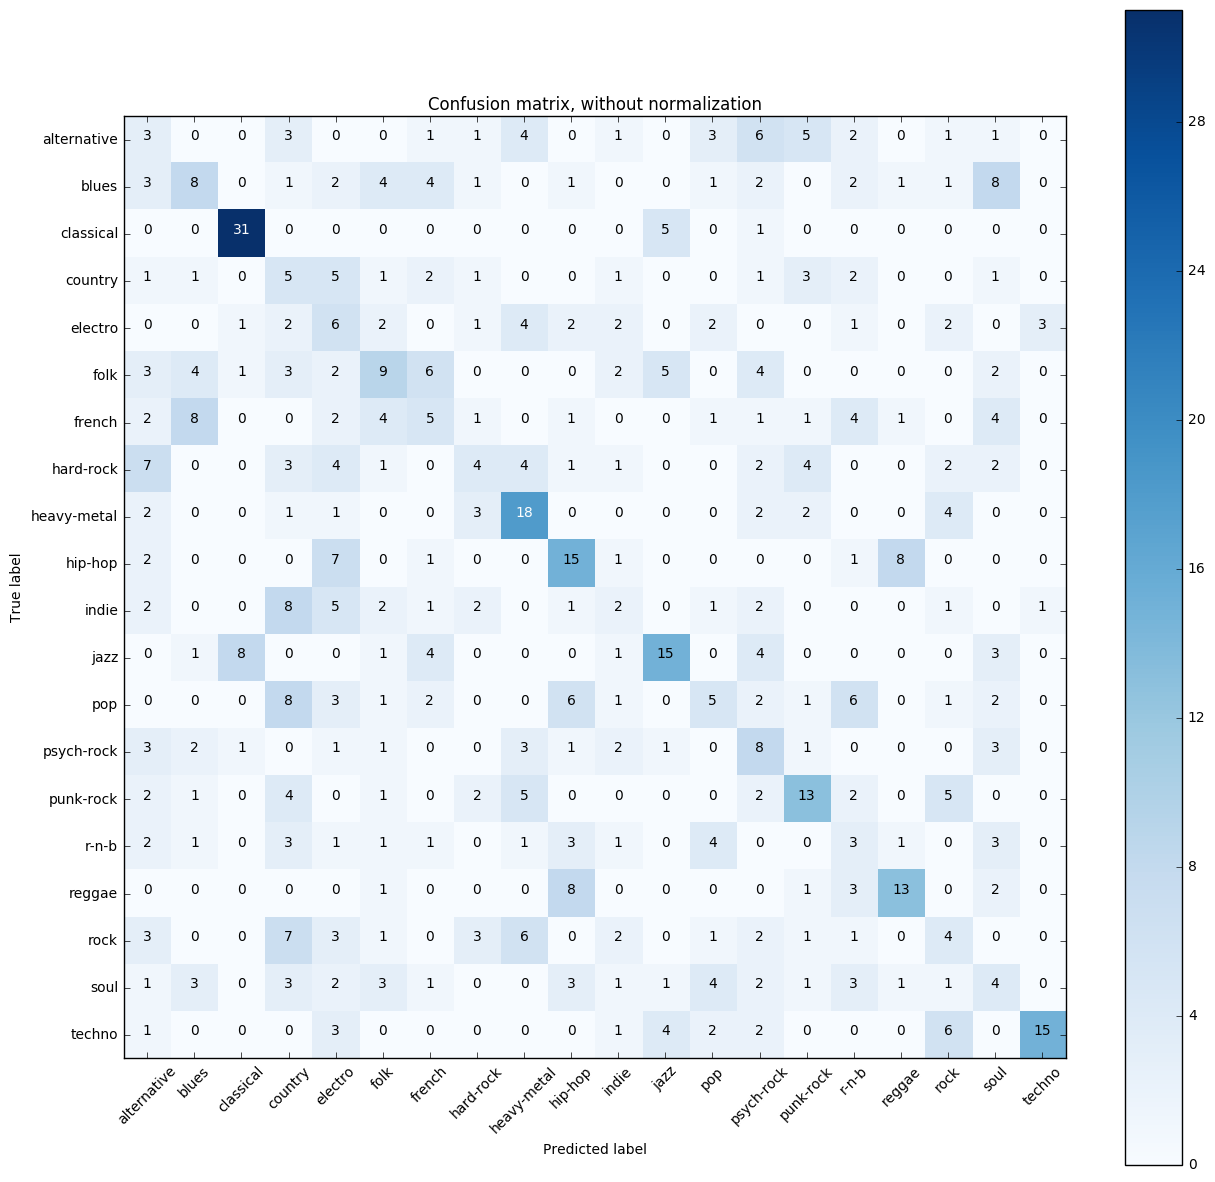

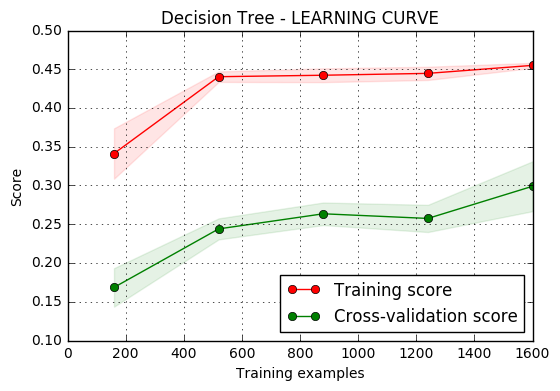

In [45]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=15)

tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
avg_tree_acc = np.mean(tree_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_tree_acc))

tree_fitted = tree_model.fit(x_train, y_train)

y_pred_tree = tree_fitted.predict(x_test)

cnf_tree = confusion_matrix(y_test, y_pred_tree)

plot_confusion_matrix(cnf_tree, classes=GENRES,
                      title='Confusion matrix, without normalization')

plot_learning_curve(tree_model, "Decision Tree - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)


# Naïve Bayes

Averaged Naïve Bayes Accuracy: 0.3085


<module 'matplotlib.pyplot' from '/home/henri/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

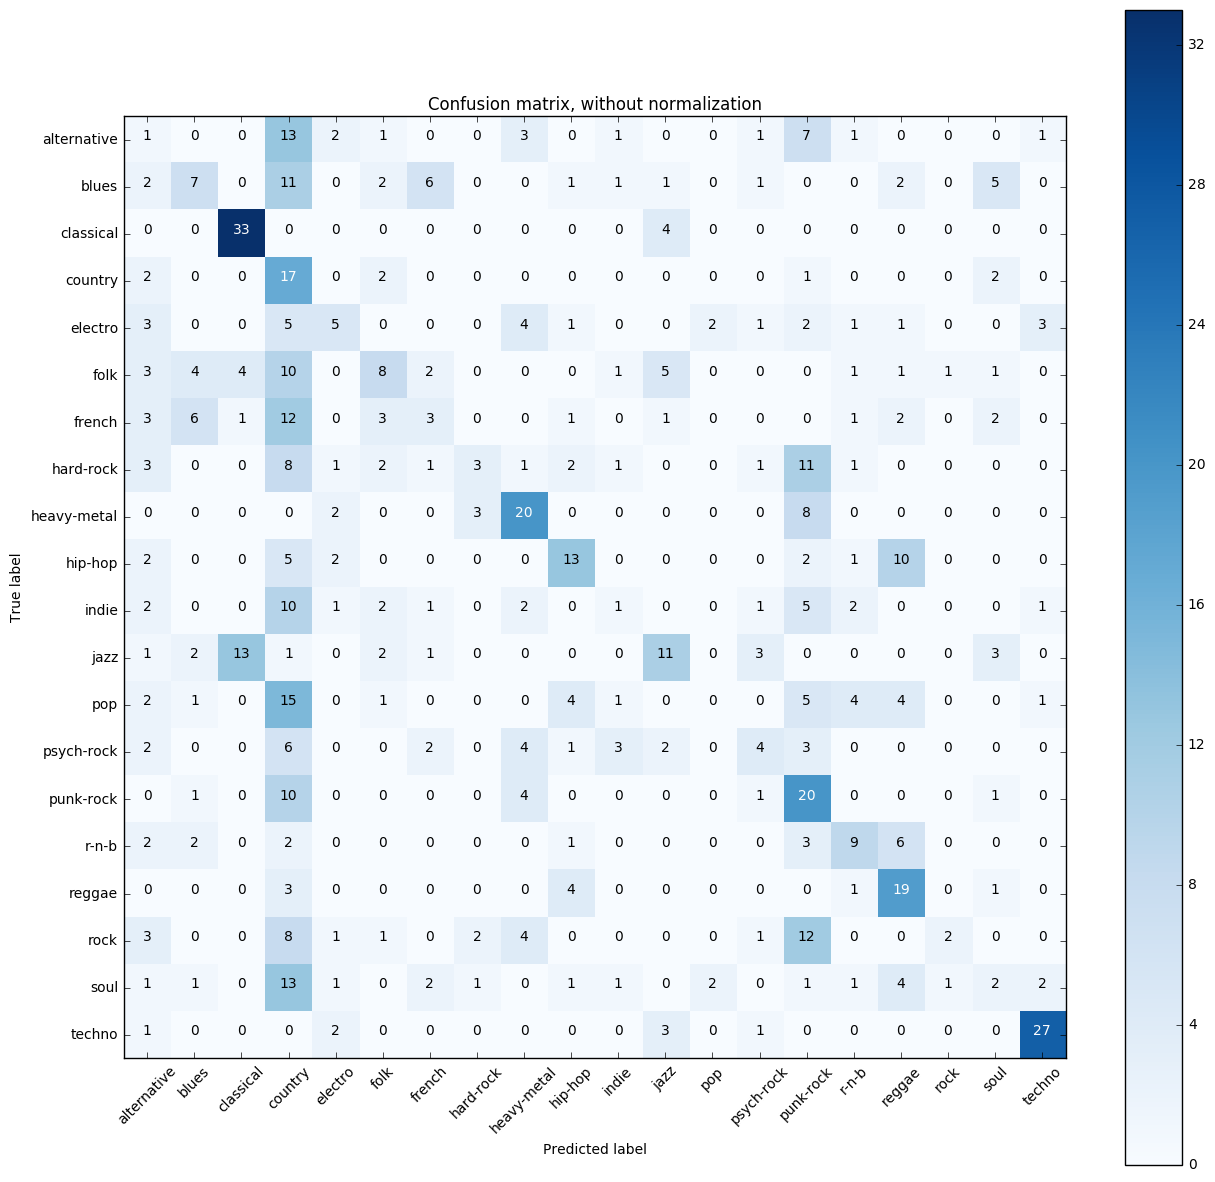

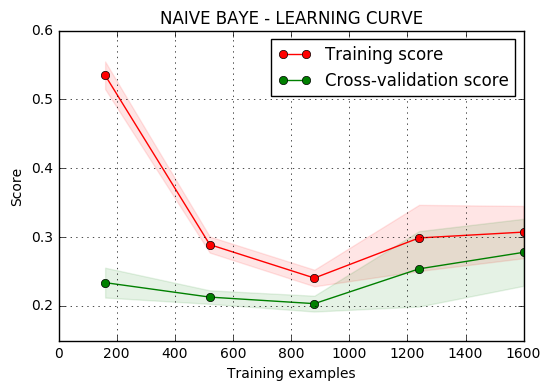

In [46]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_acc_scores = cross_val_score(NB_model, sc_attributes, target_multinomial,cv=10)

avg_NB_acc = np.mean(NB_acc_scores)
print("Averaged Naïve Bayes Accuracy: " + str(avg_NB_acc))

NB_fitted = NB_model.fit(x_train, y_train)

y_pred_NB = NB_fitted.predict(x_test)

cnf_NB = confusion_matrix(y_test, y_pred_NB)

plot_confusion_matrix(cnf_NB, classes=GENRES,
                      title='Confusion matrix, without normalization')

#train_sizes, train_scores, valid_scores = learning_curve(
#            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
plot_learning_curve(NB_model, "NAIVE BAYE - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)



# Neural Networks

Averaged Neural Networks Accuracy: 0.273


<module 'matplotlib.pyplot' from '/home/henri/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

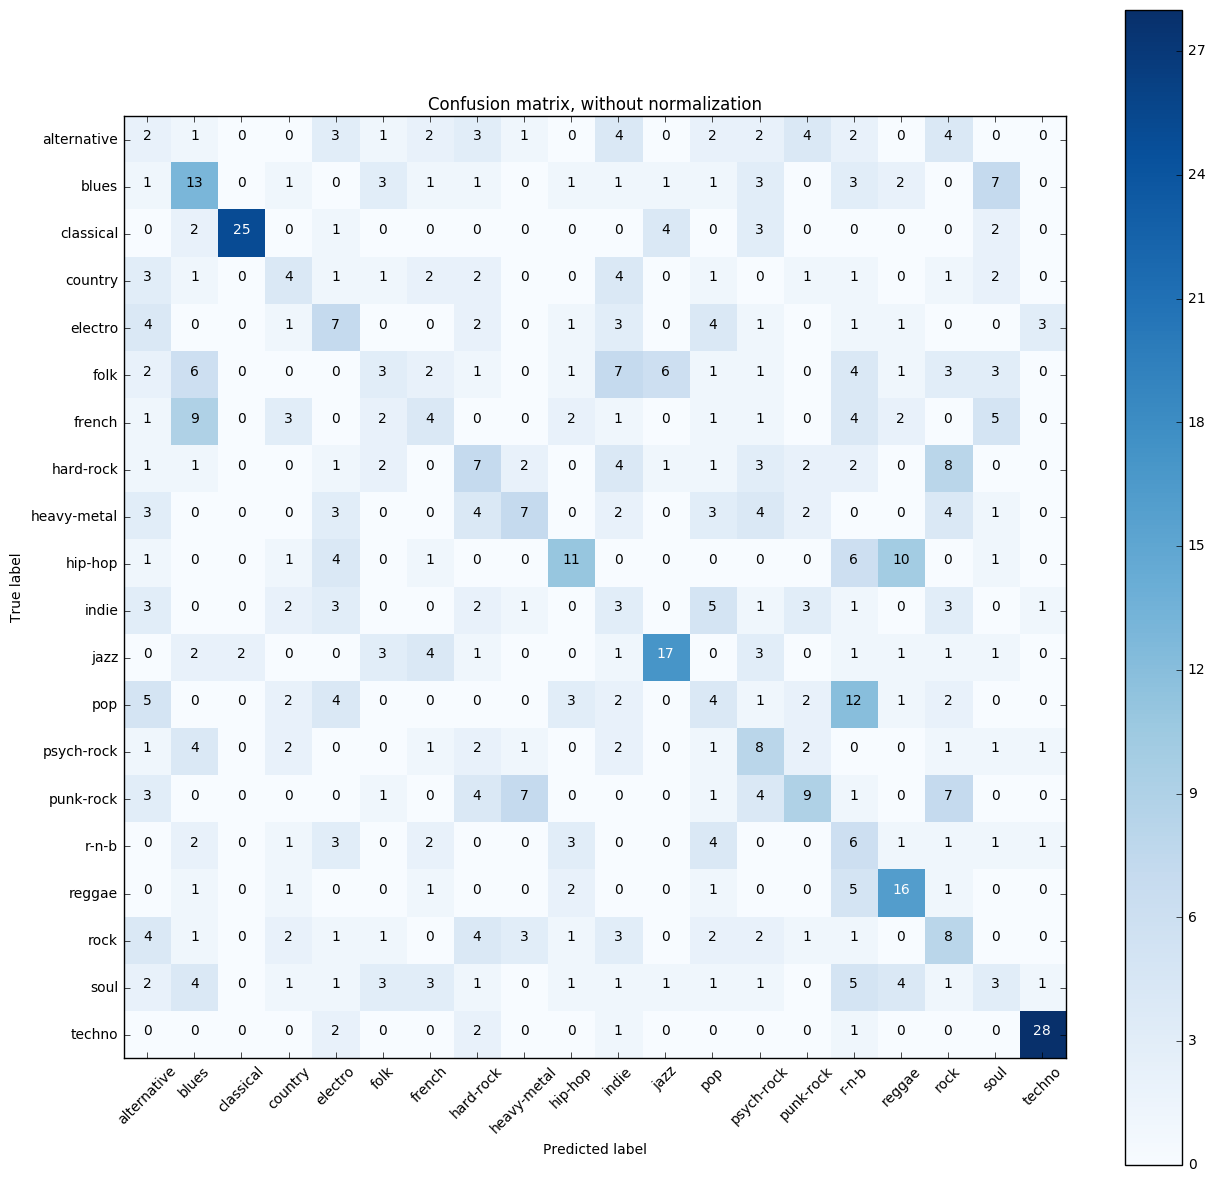

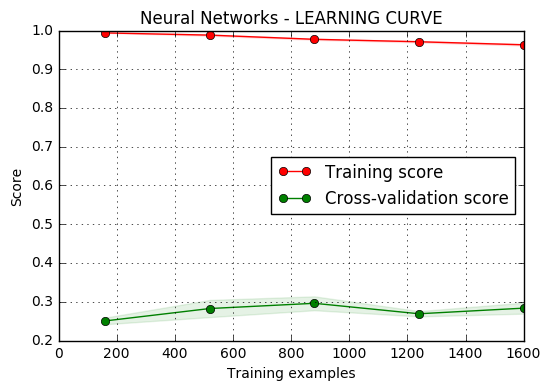

In [47]:
from sklearn.neural_network import MLPClassifier


#NN_model = MLPClassifier(random_state=1, hidden_layer_sizes=(100,),alpha=0.1,activation='tanh', solver='lbfgs', tol=1e-5)#, beta_1=0.7, beta_2=0.8)
#NN_acc_scores = cross_val_score(NN_model, sc_attributes, target_multinomial,cv=10, scoring='accuracy')
##NN_prec_scores = cross_val_score(NN_model, sc_attributes, target_multinomial,cv=10)
##NN_roc_scores = cross_val_score(NN_model, sc_attributes, target_multinomial,cv=10)tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
#
#avg_NN_acc = np.mean(NN_acc_scores)
#print("Averaged Neural Networks Accuracy: " + str(avg_NN_acc))
#
#NN_fitted = NN_model.fit(x_train, y_train)
#
#y_pred_NN = NN_fitted.predict(x_test)
#
#cnf_NN = confusion_matrix(y_test, y_pred_NN)
#
#plot_confusion_matrix(cnf_NN, classes=GENRES,
                      title='Confusion matrix, without normalization')

#train_sizes, train_scores, valid_scores = learning_curve(
#            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
plot_learning_curve(NN_model, "Neural Networks - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(min_samples_split=5, min_samples_leaf=10)
RF_acc_scores = cross_val_score(RF_model, sc_attributes, target_multinomial,cv=10)

avg_RF_acc = np.mean(NN_acc_scores)
print("Averaged Random Forest Accuracy: " + str(avg_RF_acc))

#RF_fitted = RF_model.fit(x_train, y_train)
#
#y_pred_RF = RF_fitted.predict(x_test)
#
#cnf_RF = confusion_matrix(y_test, y_pred_RF)
#
#plot_confusion_matrix(cnf_RF, classes=GENRES,
#                      title='Confusion matrix, without normalization')
#
##train_sizes, train_scores, valid_scores = learning_curve(
##            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
#plot_learning_curve(NN_model, "Random Forest - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)

Averaged Random Forest Accuracy: 0.273


# SVM

In [50]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

SVC_models = []#LinearSVC(C=1,penalty='l2')
Cs = [0.01,0.1,1,2,3,5]
for c in Cs:
    model = SVC(C=c)
    score = cross_val_score(SVC_model, sc_attributes, target_multinomial,cv=10, scoring='accuracy')
    print("Averaged accuracy for c=" + str(c) + ": " + str(np.mean(score)) )
    
    
#testModel(SVC_model, sc_attributes)
#SVC_acc_scores = cross_val_score(SVC_model, sc_attributes, target_multinomial,cv=10, scoring='accuracy')
#SVC_prec_scores = cross_val_score(SVC_model, sc_attributes, target_multinomial,cv=10)
#SVC_roc_scores = cross_val_score(SVC_model, sc_attributes, target_multinomial,cv=10)tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)

#avg_SVC_acc = np.mean(SVC_acc_scores)
#print("Averaged Neural Networks Accuracy: " + str(avg_SVC_acc))

#SVC_fitted = SVC_model.fit(x_train, y_train)
#
#y_pred_SVC = SVC_fitted.predict(x_test)
#
#cnf_SVC = confusion_matrix(y_test, y_pred_SVC)
#
#plot_confusion_matrix(cnf_SVC, classes=GENRES,
#                      title='Confusion matrix, without normalization')
#
##train_sizes, train_scores, valid_scores = learning_curve(
##            GaussianNB(), sc_attributes, target_multinomial, train_sizes=[50, 80, 110], cv=5)
#plot_learning_curve(SVC_model, "Neural Networks - LEARNING CURVE", sc_attributes, target_multinomial, cv=5, n_jobs=4)

Averaged accuracy for c=0.01: 0.3575
Averaged accuracy for c=0.1: 0.358
Averaged accuracy for c=1: 0.357
Averaged accuracy for c=2: 0.3575
Averaged accuracy for c=3: 0.3565
Averaged accuracy for c=5: 0.3575
